In [1]:
N = (26 + 4) % 5 + 1
N

1

In [ ]:
1, 2, 3, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 26

In [2]:
import pandas as pd
names_data = pd.read_csv("NationalNames.csv")

In [3]:
names_data.iloc[:8]

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [4]:
names_data.iloc[-8:]

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [4]:
names_data.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [6]:
distinct_name_count = names_data['Name'].nunique()

print(f"Кількість унікальних імен у наборі даних: {distinct_name_count}")

Кількість унікальних імен у наборі даних: 93889


In [9]:
yearly_unique_names = names_data.groupby('Year')['Name'].nunique()

yearly_unique_names

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

In [10]:
yearly_unique_names = names_data.groupby('Year')['Name'].nunique()

year_with_max_unique_names = yearly_unique_names.idxmax()
max_unique_names = yearly_unique_names.max()

print(f"Рік із найбільшою кількістю унікальних імен: {year_with_max_unique_names}, кількість імен: {max_unique_names}")

Рік із найбільшою кількістю унікальних імен: 2008, кількість імен: 32488


In [11]:
year_of_interest = 2008

data_2008 = names_data[names_data['Year'] == year_of_interest]

top_name = data_2008.loc[data_2008['Count'].idxmax(), 'Name']
top_name_count = data_2008['Count'].max()

print(f"Найпопулярніше ім'я у {year_of_interest} році: '{top_name}', кількість: '{top_name_count}'")

Найпопулярніше ім'я у 2008 році: 'Jacob', кількість: '22568'


In [12]:
jacob_data = names_data[(names_data["Name"] == "Jacob") & (names_data["Gender"] == "F")]

if not jacob_data.empty:
    max_row = jacob_data[jacob_data["Count"] == jacob_data["Count"].max()]
    
    year = max_row["Year"].values[0]
    gender = max_row["Gender"].values[0]
    id_ = max_row["Id"].values[0]
    count = max_row["Count"].values[0]

    print(f"Рік: {year}")
    print(f"Gender: {gender}")
    print(f"Id: {id_}")
    print(f"Count: {count}")
else:
    print("Ім’я 'Jacob' серед жіночих імен не зустрічається у файлі.")

Рік: 2004
Gender: F
Id: 1455557
Count: 171


In [13]:
neutral_names = names_data.groupby(["Year", "Name"])["Gender"].nunique().reset_index()

neutral_names = neutral_names[neutral_names["Gender"] == 2]

neutral_counts = neutral_names.groupby("Year")["Name"].count().reset_index()
neutral_counts.columns = ["Year", "NeutralNameCount"]

max_neutral_year = neutral_counts[neutral_counts["NeutralNameCount"] == neutral_counts["NeutralNameCount"].max()]

if not max_neutral_year.empty:
    year = max_neutral_year["Year"].values[0]
    count = max_neutral_year["NeutralNameCount"].values[0]
    print(f"Рік із найбільшою кількістю гендерно нейтральних імен: {year}")
    print(f"Кількість таких імен: {count}")
else:
    print("Гендерно нейтральні імена у файлі не знайдені.")

Рік із найбільшою кількістю гендерно нейтральних імен: 2008
Кількість таких імен: 2557


In [14]:
births_per_year = names_data.groupby("Year")["Count"].sum().reset_index()

births_per_year.columns = ["Year", "TotalBirths"]

print(births_per_year)

     Year  TotalBirths
0    1880       201484
1    1881       192699
2    1882       221538
3    1883       216950
4    1884       243467
..    ...          ...
130  2010      3686589
131  2011      3646730
132  2012      3643336
133  2013      3626802
134  2014      3670151

[135 rows x 2 columns]


In [15]:
births_per_year = names_data.groupby("Year")["Count"].sum().reset_index()

max_births_year = births_per_year[births_per_year["Count"] == births_per_year["Count"].max()]

if not max_births_year.empty:
    year = max_births_year["Year"].values[0]
    total_births = max_births_year["Count"].values[0]
    print(f"Рік із найбільшою кількістю народжень: {year}")
    print(f"Кількість народжень у цьому році: {total_births}")
else:
    print("Даних про народження немає у файлі.")

Рік із найбільшою кількістю народжень: 1957
Кількість народжень у цьому році: 4200026


In [16]:
births_by_gender = names_data.groupby(["Year", "Gender"])["Count"].sum().reset_index()
births_by_gender_pivot = births_by_gender.pivot(index="Year", columns="Gender", values="Count").reset_index()
births_by_gender_pivot.columns = ["Year", "FemaleBirths", "MaleBirths"]
births_by_gender_pivot.fillna(0, inplace=True)

births_by_gender_pivot.head()

,Year,FemaleBirths,MaleBirths
0,1880,90993,110491
1,1881,91954,100745
2,1882,107850,113688
3,1883,112321,104629
4,1884,129022,114445


In [17]:
births_by_gender = names_data.groupby(["Year", "Gender"])["Count"].sum().reset_index()
births_by_gender_pivot = births_by_gender.pivot(index="Year", columns="Gender", values="Count").reset_index()
births_by_gender_pivot.columns = ["Year", "FemaleBirths", "MaleBirths"]

births_by_gender_pivot.fillna(0, inplace=True)
years_with_more_females = births_by_gender_pivot[births_by_gender_pivot["FemaleBirths"] > births_by_gender_pivot["MaleBirths"]]
count_years = len(years_with_more_females)

print(f"Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків: {count_years}")

Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків: 54


In [18]:
barbara_male_data = names_data[(names_data["Name"] == "Barbara") & (names_data["Gender"] == "M")]
total_barbara_male = barbara_male_data["Count"].sum()

print(f"Кількість разів, коли хлопчиків називали Barbara: {total_barbara_male}")

Кількість разів, коли хлопчиків називали Barbara: 4139


In [19]:
unique_years_count = names_data["Year"].nunique()

print(f"Кількість років, протягом яких проводилось спостереження: {unique_years_count}")

Кількість років, протягом яких проводилось спостереження: 135


In [23]:
neutral_names = names_data.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
neutral_names = neutral_names[neutral_names['Gender'] == 2]

all_years = set(names_data['Year'].unique())
names_by_year = neutral_names.groupby('Name')['Year'].apply(set)
consistent_neutral_names = [name for name, years in names_by_year.items() if years == all_years]

popular_names = names_data[names_data['Name'].isin(consistent_neutral_names)].groupby('Name')['Count'].sum()
popular_names = popular_names.sort_values(ascending=False)

popular_names.head(16)

Name
James      5129096
John       5106590
Robert     4816785
William    4071368
Joseph     2580687
Jean        480901
Jesse       421406
Leslie      376587
Francis     312147
Lee         291691
Jessie      274931
Marion      259549
Johnnie     149953
Sidney      105185
Ollie        56482
Tommie       51315
Name: Count, dtype: int64

In [24]:
name_counts = names_data.groupby('Name')['Count'].sum()

unpopular_names = name_counts[name_counts <= 160]

most_popular_of_unpopular = unpopular_names.idxmax()
most_popular_of_unpopular_count = unpopular_names.max()

print(f"Найпопулярніше серед непопулярних імен: {most_popular_of_unpopular}")
print(f"Кількість використань цього імені: {most_popular_of_unpopular_count}")

Найпопулярніше серед непопулярних імен: Adriyana
Кількість використань цього імені: 160


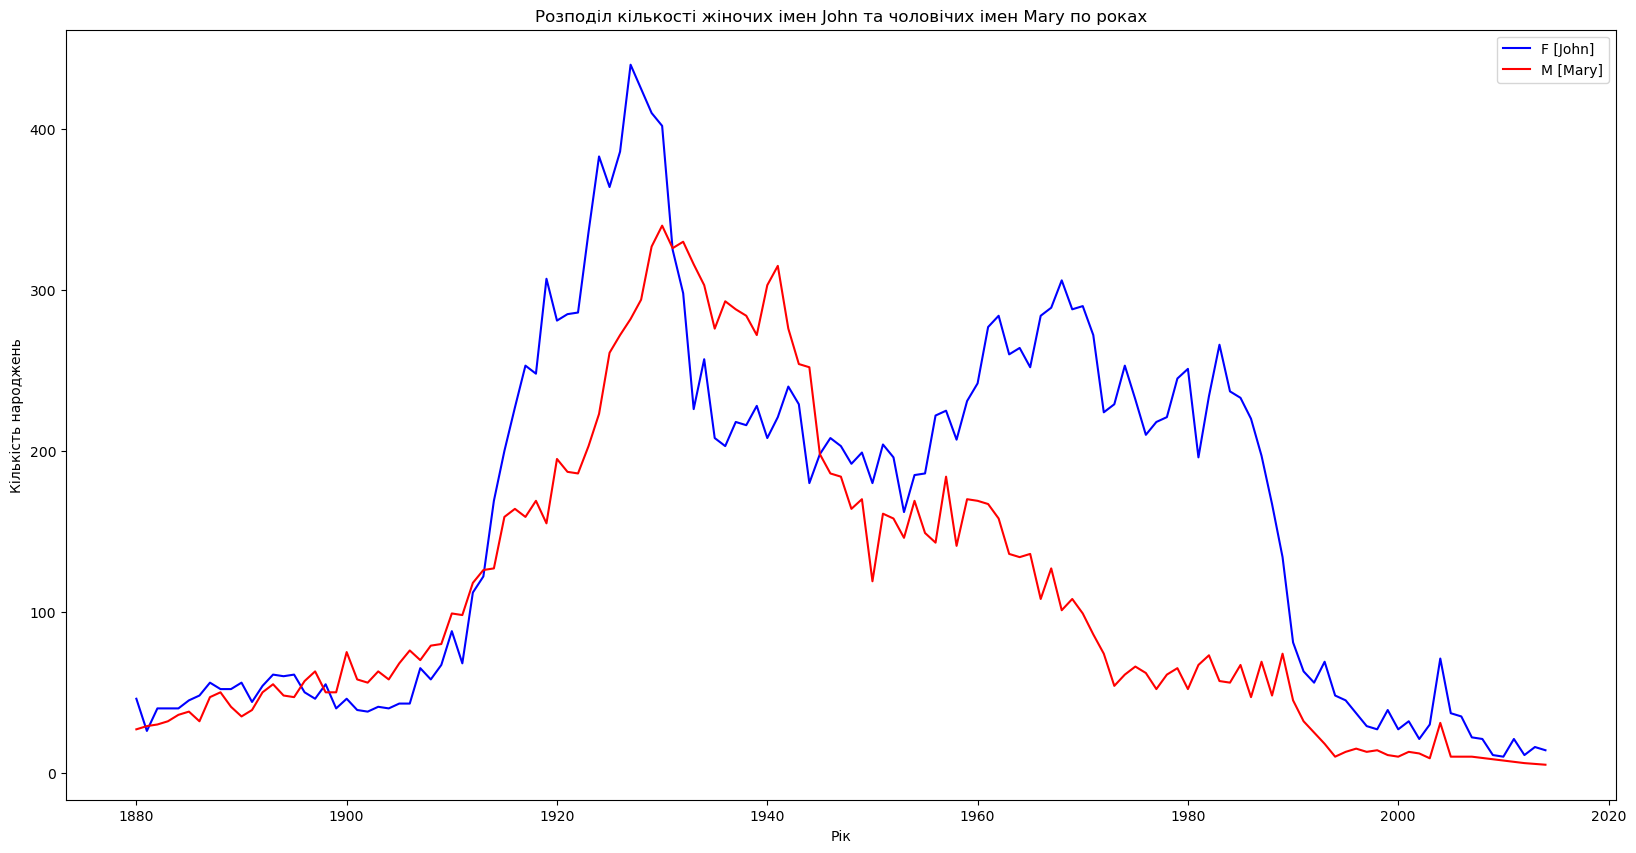

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

female_john = names_data[(names_data["Name"] == "John") &
                         (names_data["Gender"] == "F")].groupby("Year")["Count"].sum()

male_mary = names_data[(names_data["Name"] == "Mary") &
                       (names_data["Gender"] == "M")].groupby("Year")["Count"].sum()

plt.figure(figsize=(20, 10))

plt.plot(female_john.index, female_john.values, label="F [John]", color="blue")

plt.plot(male_mary.index, male_mary.values, label="M [Mary]", color="red")

plt.title("Розподіл кількості жіночих імен John та чоловічих імен Mary по роках")
plt.xlabel("Рік")
plt.ylabel("Кількість народжень")
plt.legend()

plt.show()